In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [35]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [36]:
# Normalize
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0

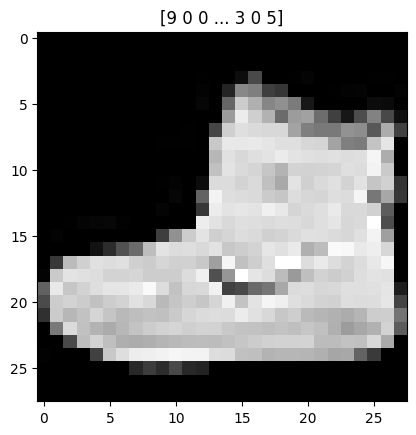

In [37]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train)
plt.show()

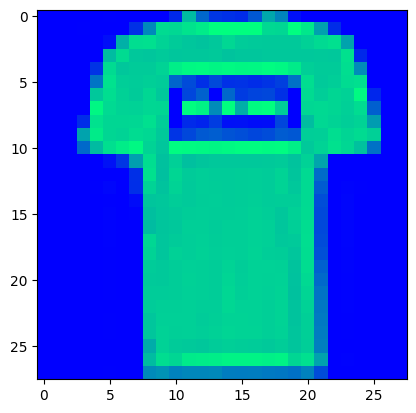

In [38]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1], cmap='winter')
plt.show()

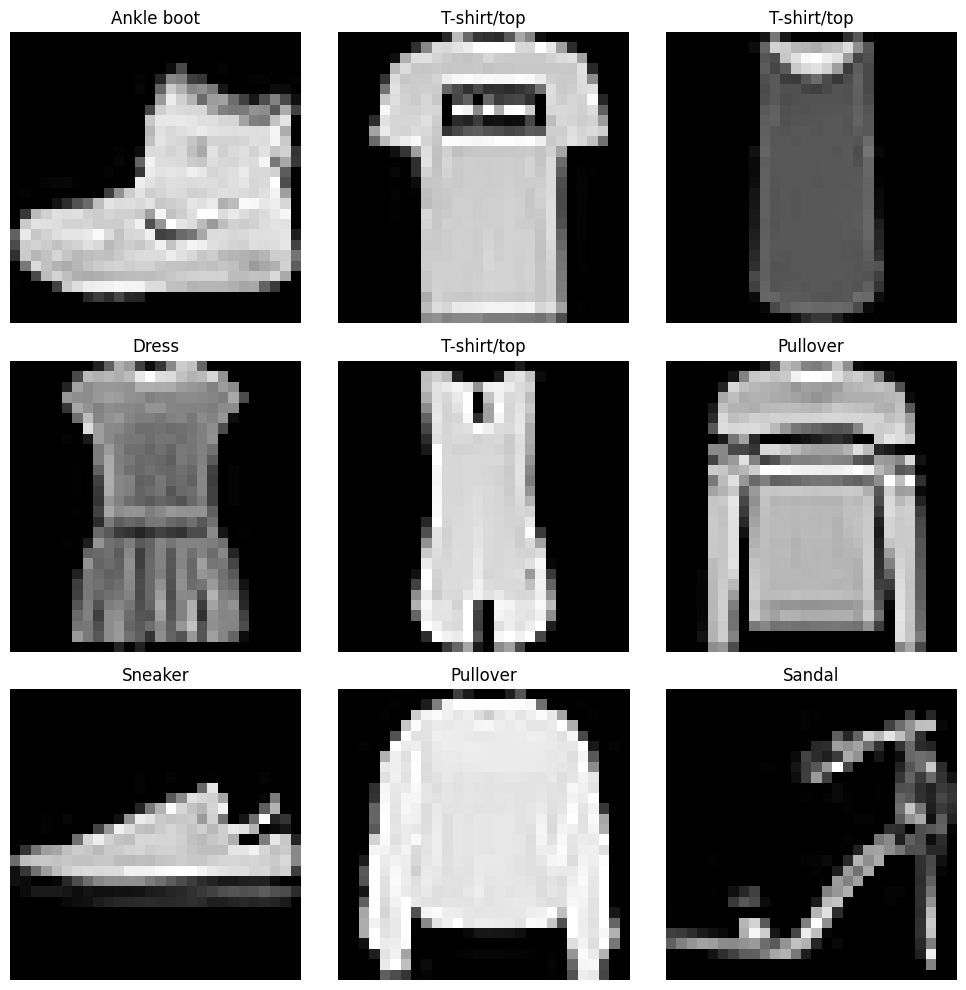

In [39]:
# Class names
class_names = [
    'T-shirt/top','Trouser','Pullover','Dress','Coat',
    'Sandal','Shirt','Sneaker','Bag','Ankle boot'
]

plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(X_train_norm, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.7310 - loss: 0.7173 - val_accuracy: 0.8728 - val_loss: 0.3504
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.8745 - loss: 0.3455 - val_accuracy: 0.8932 - val_loss: 0.2999
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.8991 - loss: 0.2789 - val_accuracy: 0.8977 - val_loss: 0.2807
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9077 - loss: 0.2491 - val_accuracy: 0.9045 - val_loss: 0.2618
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9174 - loss: 0.2253 - val_accuracy: 0.9080 - val_loss: 0.2554
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9231 - loss: 0.2035 - val_accuracy: 0.9138 - val_loss: 0.2474
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9309 - loss: 0.1828 - val_accuracy: 0.9068 - val_loss: 0.2657
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.9338 -

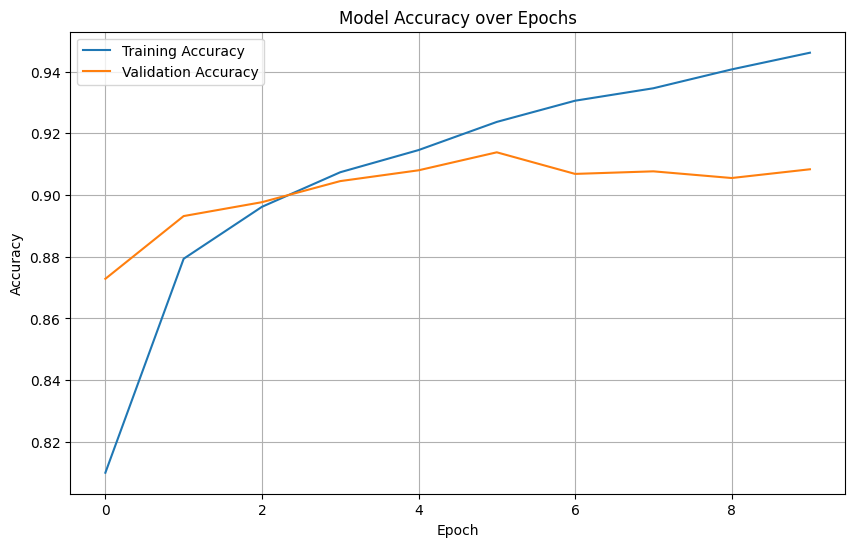

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

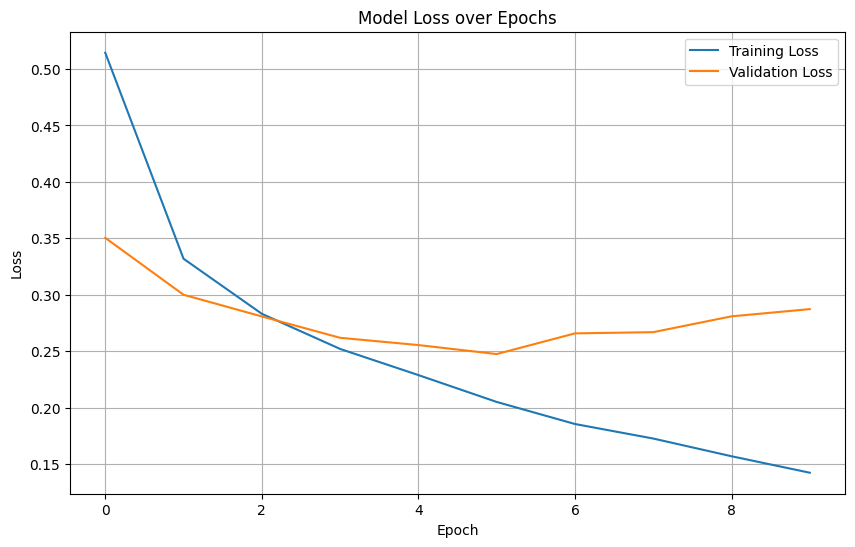

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test, verbose=2)
print("Test Accuracy: ", test_accuracy)
print("Test Loss: ", test_loss)

313/313 - 2s - 7ms/step - accuracy: 0.9017 - loss: 0.3069
Test Accuracy:  0.9017000198364258
Test Loss:  0.3069029152393341


In [46]:
history

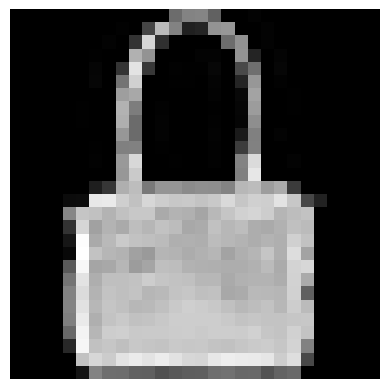

Predicted Label: Bag
Actual Label: Bag


In [67]:
ind=9258
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.imshow(X_test_norm[ind].reshape(28,28), cmap="gray")
plt.axis("off")
plt.show()
pred = model.predict(X_test_norm[ind].reshape(1,28,28,1), verbose=0)
predicted_label = np.argmax(pred)

print("Predicted Label:", class_names[predicted_label])
print("Actual Label:", class_names[y_test[ind]])